In [1]:
%install_ext https://raw.githubusercontent.com/joelkim/ipython-tikzmagic/master/tikzmagic.py

/home/dockeruser/anaconda2/lib/python2.7/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


In [2]:
%load_ext tikzmagic

- 딥러닝 쪽은 사이킷런처럼 쉽게 사용할 수 있는 것이 없다. 케라스도 미완성이긴 하다. 에너지, 볼즈마 머신? 이것들도 미완성. 그래서 직접 코딩이 빨라. 개념만 설명하고 마칠 수 밖에 없는 게 코딩이 너무 길기도 해서
- 신경망은 퍼셉트론 같은 애야. 퍼셉트론이나 SVM은 선을 그어서 정의했었어
- 이중 퍼셉트론 형태로 된다. w2를 퍼셉트론으로 만들고 그것을 다시 넣는 작업

# 신경망 기초 이론

신경망(neural network) 모형은 퍼셉트론, 서포트 벡터 머신, 로지스틱 회귀 등의 분류 모형과 달리 기저 함수(basis function)도 사용자 파라미터에 의해 변화할 수 있는 적응형 기저 함수 모형(adaptive basis function model)이며 구조적으로는 여러개의 퍼셉트론을 쌓아놓은 형태이므로 MLP(multi-layer perceptron)으로도 불린다.

## 퍼셉트론 복습

다음 그림과 같이 독립 변수 벡터가 3차원인 간단한 퍼셉트론 모형을 가정한다.

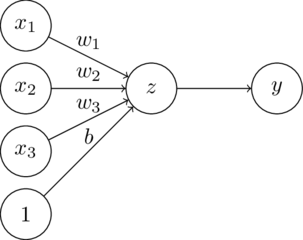

In [5]:
%%tikz
\tikzstyle{neuron}=[circle, draw, minimum size=23pt,inner sep=0pt]
\tikzstyle{bias}=[text centered]

\node[neuron] (node) at (2,0) {$z$};
\node[neuron] (x1) at (0, 1) {$x_1$};
\node[neuron] (x2) at (0, 0) {$x_2$};
\node[neuron] (x3) at (0,-1) {$x_3$};
\node[neuron] (b)  at (0,-2) {$1$};
\node[neuron] (output) at (4,0) {$y$};
\draw[->] (x1) -- node[above] {$w_1$} (node);
\draw[->] (x2) -- node[above] {$w_2$} (node);
\draw[->] (x3) -- node[above] {$w_3$} (node);
\draw[->] (b) -- node[above] {$b$} (node);
\draw[->] (node) -- (output);

* 입력 $x$
 $$ x_1,x_2,x_3 $$
 
* 가중치  $w$
 $$ w_1, w_2, w_3 $$

* 상수항(bias) $b$를 포함한 활성화값(activation)
 $$ a = \sum_{j=1}^3 w_j x_j + b $$

* 비선형 활성화 함수 $f$
 $$ z = f(a) = f \left( \sum_{j=1}^3 w_j x_j + b \right) $$


* 출력 $y$
$$
y = 
\begin{cases} 
0 & \text{if } z \leq 0, \\
1 & \text{if } z > 0
\end{cases}
$$

이런 퍼셉트론에서 $x$ 대신 기저 함수를 적용한 $\phi(x)$를 사용하면 XOR 문제 등의 비선형 문제를 해결할 수 있다. 그러나 고정된 기저 함수를 사용해야 하므로 문제에 맞는 기저 함수를 찾아야 한다는 단점이 있다.

만약 기저 함수 $\phi(x)$의 형태를 추가적인 모수 $w^{(1)}$를 사용하여 조절할 수 있다면 즉, 기저함수 $\phi(x;w^{(1)})$ 를 사용하면 $w^{(1)}$ 값을 바꾸는 것만으로 다양한 기저 함수를 시도할 수 있다.


 $$ z = f \left(  \sum_{j=1} w_j^{(2)} \phi(x_j ; w^{(1)}, b^{(1)}) + b^{(2)} \right) $$

신경망은 다음과 같이 원래 퍼셉트론과 같은 형태의 적응형 기저함수를 사용한 모형이다.

$$ \phi(x_j ; w^{(1)}, b^{(1)})  = f \left(  \sum_{i=1} w_i^{(1)} w + b^{(1)} \right)  $$

즉 전체 모형은 다음과 같다.

$$ z = f \left(  \sum_{j=1} w_j^{(2)} f \left(  \sum_{i=1} w_i^{(1)} w + b^{(1)} \right)  + b^{(2)} \right) $$

일반적으로 활성화 함수 $f$ 는 다음과 같은 시그모이드 함수 $\sigma$를 사용한다.


$$ 
\begin{eqnarray} 
z = \sigma(a) \equiv \frac{1}{1+e^{-a}}.
\end{eqnarray} 
$$

$$ 
\begin{eqnarray} 
\frac{1}{1+\exp(-\sum_j w_j x_j-b)}
\end{eqnarray} 
$$

이 시그모이드 함수의 특징은 다음과 같은 미분값을 가진다는 것이다.

$$ \sigma' = \sigma(1-\sigma) $$


## 퍼셉트론을 사용한 XOR 문제 해결법

- 퍼셉트론은 사실 디지털 회로와 같다. NAND는 AND에다가 NOT을 붙인 것. NAND를 조합하면 모든 경우를 다 구할 수 있다.
- 반가산기를 이용하면 한 비트 계산을 할 수 있다. 하나의 중간 모양들이 퍼셉트론 하나이다. 퍼셉트론을 가지고 XOR문제를 푼 것이다. 그래서 basis function으로 퍼셉트론을 쓰면 왠만한 것들이 다 풀린다는 것을 알게 되었다.

퍼셉트론를 연속적으로 연결하여 비선형 문제를 해결하는 방법은 이미 디지털 회로 설계에서 사용되던 방법이다.

퍼셉트론의 가중치를 적절히 조정하면 다음과 같은 AND / OR 등의 디지털 게이트(gate)를 제작할 수 있다.

예를 들어 $w_1 = -2$, $w_2 = -2$, $b = 3$ 인 퍼셉트론은 NAND 게이트를 구현한다.


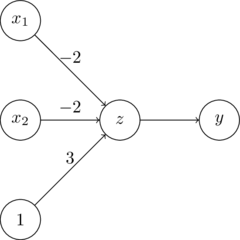

In [11]:
%%tikz
\tikzstyle{neuron}=[circle, draw, minimum size=23pt,inner sep=0pt, node distance=2cm]

\node[neuron] (node) {$z$};
\node[neuron] (x2) [left of=node] {$x_2$};
\node[neuron] (x1) [above of=x2]  {$x_1$};
\node[neuron] (b)  [below of=x2]  {$1$};
\node[neuron] (output) [right of=node] {$y$};
\draw[->] (x1) -- node[above=0.1] {$-2$} (node);
\draw[->] (x2) -- node[above] {$-2$} (node);
\draw[->] (b) -- node[above=0.1] {$3$} (node);
\draw[->] (node) -- (output);


<table style="display: inline-table; margin-right: 30pt;">
<tbody><tr style="background:#def; text-align:center;">
<td colspan="2"><b>INPUT</b></td>
<td><b>OUTPUT</b></td>
</tr>
<tr style="background:#def; text-align:center;">
<td>A</td>
<td>B</td>
<td>A NAND B</td>
</tr>
<tr style="background:#dfd; text-align:center;">
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
<tr style="background:#dfd; text-align:center;">
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr style="background:#dfd; text-align:center;">
<td>1</td>
<td>0</td>
<td>1</td>
</tr>
<tr style="background:#dfd; text-align:center;">
<td>1</td>
<td>1</td>
<td>0</td>
</tr>
</tbody></table>


* $x_1 = 0$, $x_2 = 0$
 * $ (−2)\times 0+(−2)\times 0+3=(−2)\times 0+(−2)\times 0+3=3 > 0 \rightarrow 1$
* $x_1 = 0$, $x_2 = 1$
 * $ (−2)\times 0+(−2)\times 1+3=(−2)\times 0+(−2)\times 1+3=1 > 0 \rightarrow 1$
* $x_1 = 1$, $x_2 = 0$
 * $ (−2)\times 1+(−2)\times 0+3=(−2)\times 1+(−2)\times 0+3=1 > 0 \rightarrow 1$
* $x_1 = 1$, $x_2 = 1$
 * $ (−2)\times 1+(−2)\times 1+3=(−2)\times 1+(−2)\times 1+3=-1 < 0 \rightarrow 0$


시그모이드를 통과하면 1,1,1,0의 값들로 된다.

디지털 회로에서는 복수개의 NAND 게이트를 조합하면 어떤 디지털 로직이라도 구현 가능하다. 예를 들어 다음 회로는 두 입력 신호의 합과 자릿수를 반환하는 반가산기(half adder) 회로이다.

<img src="https://datascienceschool.net/upfiles/3002b65c9f034818a318ad7f6b09671f.png">

이 퍼셉트론 조합을 보면 4개의 퍼셉트론을 연결하여 XOR 로직을 구현하였음을 알 수 있다.

## 다계층 퍼셉트론 (MLP: Multi-Layer Perceptrons)

* 이런 것을 여러 개 그렸을 때 이런 그림이 나온다. 2차 다항식은 차원이 하나 늘어난 것이고 RBF의 경우에는 무한대다.
* 이왕 히든 레이어 만든 거 여러개 더 만들면 되지 않느냐? 바이너리 클레시피케이션 하는 애다. 아웃풋 레이어.
* 히든레이어 15개 썼다는 것은 PCA와 같은 개념. 리니어에 시그모이드를 통과하면 리니어가 안 된다. 이 모델에서 선택적으로 15개 쓴 것이다. 1개 쓰는 케이스는 뭘까? 그것은 압축기다. 784개 들어가서 15개 히든으로 쓰고 784개로 아웃풋 나와서 비슷한게 나오는 웨이트를 발견했다면 압축기가 만들어진 것이다. 오토인코더라고 부른다.
* 보통은 앞단이 엄청 많고 히든은 그거보다 좀 적고 아웃풋은 그거보다 좀 더 적다.

신경망은 퍼셉트론을 여러개 연결한 것으로 다계층 퍼셉트론(MLP: Multi-Layer Perceptrons)이라고도 한다. 신경망에 속한 퍼셉트론은 뉴론(neuron) 또는 노드(node)라고 불린다.

각 계층(layer)은 다음 계층에 대해 적응형 기저 함수의 역할을 한다. 최초의 계층은 입력 계층(input layer), 마지막 계측은 출력 계층(output layer)이라고 하며 중간은 은닉 계층(hidden layer)라고 한다.

<img src="https://datascienceschool.net/upfiles/4dcef7b75de64023900c7f7edb7cbb2f.png">

MLP의 또다른 특징은 출력 계층에 복수개의 출력 뉴런를 가지고 각 뉴런값으로 출력 클래스의 조건부 확률을 반환하도록 설계하여 멀티 클래스 문제를 해결할 수도 있다는 점이다.

다음은 필기 숫자에 대한 영상 정보를 입력 받아 숫자 0 ~ 9 까지의 조건부 확률을 출력하는 MLP의 예이다. 입력 영상이 28 x 28 해상도를 가진다면 입력 계층의 뉴런 수는 $28 \times 28 = 784$ 개가 된다. 출력은 숫자 0 ~ 9 까지의 조건부 확률을 출력하는 $10$ 개의 뉴런을 가진다.

그림의 모형은 $15$개의 뉴런을 가지는 $1$ 개의 은닉 계층을 가진다.

<img src="https://datascienceschool.net/upfiles/90f2752671424cef846839b89ddcf6aa.png">


## 신경망 가중치 표기법

신경망의 가중치는 $w^{l}_{j,k}$ 과 같이 표기한다. 이 가중치는  $l$ 번째 계층의  $k$번째 뉴런와 $l+1$ 번째 계층의 $j$번째 뉴런을 연결하는 가중치를 뜻한다. 첨자의 순서에 주의한다.


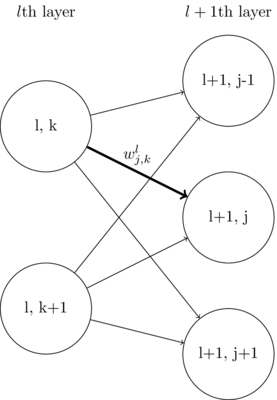

In [6]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node () at (0, 4.5) {$l$th layer};
\node () at (4, 4.5) {$l+1$th layer};
\node[neuron] (i1) at (0,  2) {l, k};
\node[neuron] (i2) at (0, -2) {l, k+1};
\node[neuron] (h11) at (4,  3) {l+1, j-1};
\node[neuron] (h12) at (4,  0) {l+1, j};
\node[neuron] (h13) at (4, -3) {l+1, j+1};
\draw[->] (i1) -- (h11);
\draw[->] (i2) -- (h11);
\draw[->, line width=0.5mm] (i1) -- node[above=0.2] {$w^{l}_{j,k}$ } (h12);
\draw[->] (i2) -- (h12);
\draw[->] (i1) -- (h13);
\draw[->] (i2) -- (h13);
#이거 코드는 무시

앞단은 l번째 레이어. j, k의 순서는 뒤바뀌어 있다. 왜 그러냐면 나중에 수식할 때 행렬식으로 나타낼 수 있기 때문

## Feedforward propagation

오메가 값이 정해져 있다. j번째 레이어 전체를 벡터로 표시한 것이 j라는 인덱스를 뺀 밑의 수식과 같다. w값을 메트릭스 하나로 표시할 수 있다.

신경망의 계산 과정은 실제 신경망에서 신호가 전달되는 과정과 유사하므로 Feedforward propagation 이라고 불린다.

$l$번째 계층의 $j$번째 뉴런에서의 출력값 $z^l$은 다음과 같이 정의된다.


$$
\begin{eqnarray} 
  z^{l}_j = \sigma \left( \sum_k w^{l}_{jk} z^{l-1}_k + b^l_j \right) = \sigma \left( w^{l}_{j} \cdot z^{l-1} + b^l_j \right)
\end{eqnarray}
$$

$l$번째 계층 전체의 출력은 다음과 같이 표시할 수 있다.

$$
\begin{eqnarray} 
  z^{l} = \sigma\left( \sum_k w^{l}_{k} z^{l-1}_k + b^l \right) = \sigma\left( w^{l}  \cdot z^{l-1} + b^l \right)
\end{eqnarray}
$$


$$
a^l \equiv w^l \cdot z^{l-1}+b^l
$$


$$
\begin{eqnarray} 
  z^{l} =  \sigma\left( a^l \right)
\end{eqnarray}
$$

아래에 Feedforward propagation 예를 보였다.

a는 미분 구하려고 남겨둔 것이다. z만 쓰는데 a를 남겨둔 이유는 그렇다. 

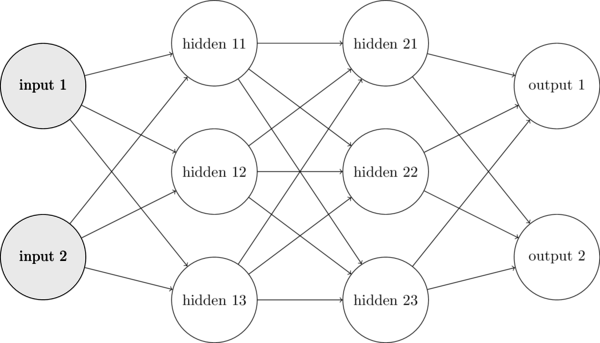

In [13]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node[neuron, fill=gray!10] (i1) at (0,  2) {input 1};
\node[neuron, fill=gray!10] (i2) at (0, -2) {input 2};

\node[neuron] (h11) at (4,  3) {hidden 11};
\node[neuron] (h12) at (4,  0) {hidden 12};
\node[neuron] (h13) at (4, -3) {hidden 13};
\draw[->] (i1) -- (h11);
\draw[->] (i2) -- (h11);
\draw[->] (i1) -- (h12);
\draw[->] (i2) -- (h12);
\draw[->] (i1) -- (h13);
\draw[->] (i2) -- (h13);

\node[neuron] (h21) at (8,  3) {hidden 21};
\node[neuron] (h22) at (8,  0) {hidden 22};
\node[neuron] (h23) at (8, -3) {hidden 23};
\draw[->] (h11) -- (h21);
\draw[->] (h11) -- (h22);
\draw[->] (h11) -- (h23);
\draw[->] (h12) -- (h21);
\draw[->] (h12) -- (h22);
\draw[->] (h12) -- (h23);
\draw[->] (h13) -- (h21);
\draw[->] (h13) -- (h22);
\draw[->] (h13) -- (h23);

\node[neuron] (o1) at (12,  2) {output 1};
\node[neuron] (o2) at (12, -2) {output 2};
\draw[->] (h21) -- (o1);
\draw[->] (h21) -- (o2);
\draw[->] (h22) -- (o1);
\draw[->] (h22) -- (o2);
\draw[->] (h23) -- (o1);
\draw[->] (h23) -- (o2);

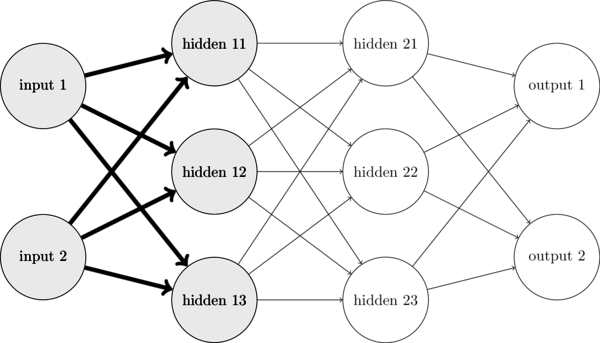

In [14]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node[neuron, fill=gray!10] (i1) at (0,  2) {input 1};
\node[neuron, fill=gray!10] (i2) at (0, -2) {input 2};

\node[neuron, fill=gray!10] (h11) at (4,  3) {hidden 11};
\node[neuron, fill=gray!10] (h12) at (4,  0) {hidden 12};
\node[neuron, fill=gray!10] (h13) at (4, -3) {hidden 13};
\draw[->, line width=1mm] (i1) -- (h11);
\draw[->, line width=1mm] (i2) -- (h11);
\draw[->, line width=1mm] (i1) -- (h12);
\draw[->, line width=1mm] (i2) -- (h12);
\draw[->, line width=1mm] (i1) -- (h13);
\draw[->, line width=1mm] (i2) -- (h13);

\node[neuron] (h21) at (8,  3) {hidden 21};
\node[neuron] (h22) at (8,  0) {hidden 22};
\node[neuron] (h23) at (8, -3) {hidden 23};
\draw[->] (h11) -- (h21);
\draw[->] (h11) -- (h22);
\draw[->] (h11) -- (h23);
\draw[->] (h12) -- (h21);
\draw[->] (h12) -- (h22);
\draw[->] (h12) -- (h23);
\draw[->] (h13) -- (h21);
\draw[->] (h13) -- (h22);
\draw[->] (h13) -- (h23);

\node[neuron] (o1) at (12,  2) {output 1};
\node[neuron] (o2) at (12, -2) {output 2};
\draw[->] (h21) -- (o1);
\draw[->] (h21) -- (o2);
\draw[->] (h22) -- (o1);
\draw[->] (h22) -- (o2);
\draw[->] (h23) -- (o1);
\draw[->] (h23) -- (o2);

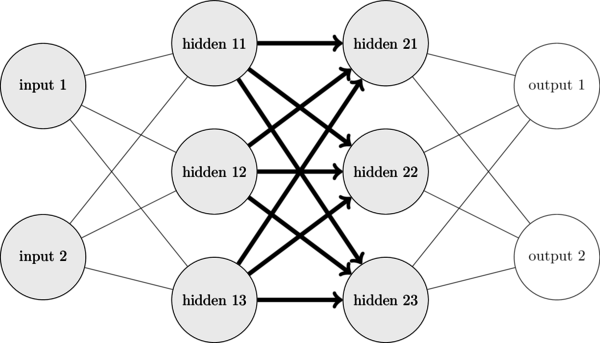

In [15]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node[neuron, fill=gray!10] (i1) at (0,  2) {input 1};
\node[neuron, fill=gray!10] (i2) at (0, -2) {input 2};

\node[neuron, fill=gray!10] (h11) at (4,  3) {hidden 11};
\node[neuron, fill=gray!10] (h12) at (4,  0) {hidden 12};
\node[neuron, fill=gray!10] (h13) at (4, -3) {hidden 13};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {hidden 21};
\node[neuron, fill=gray!10] (h22) at (8,  0) {hidden 22};
\node[neuron, fill=gray!10] (h23) at (8, -3) {hidden 23};
\draw[->, line width=1mm] (h11) -- (h21);
\draw[->, line width=1mm] (h11) -- (h22);
\draw[->, line width=1mm] (h11) -- (h23);
\draw[->, line width=1mm] (h12) -- (h21);
\draw[->, line width=1mm] (h12) -- (h22);
\draw[->, line width=1mm] (h12) -- (h23);
\draw[->, line width=1mm] (h13) -- (h21);
\draw[->, line width=1mm] (h13) -- (h22);
\draw[->, line width=1mm] (h13) -- (h23);

\node[neuron] (o1) at (12,  2) {output 1};
\node[neuron] (o2) at (12, -2) {output 2};
\draw[-] (h21) -- (o1);
\draw[-] (h21) -- (o2);
\draw[-] (h22) -- (o1);
\draw[-] (h22) -- (o2);
\draw[-] (h23) -- (o1);
\draw[-] (h23) -- (o2);

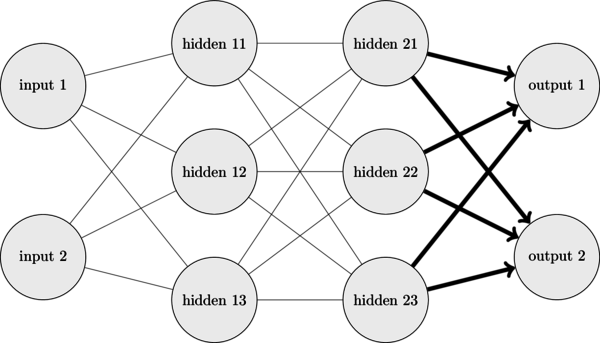

In [17]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node[neuron, fill=gray!10] (i1) at (0,  2) {input 1};
\node[neuron, fill=gray!10] (i2) at (0, -2) {input 2};

\node[neuron, fill=gray!10] (h11) at (4,  3) {hidden 11};
\node[neuron, fill=gray!10] (h12) at (4,  0) {hidden 12};
\node[neuron, fill=gray!10] (h13) at (4, -3) {hidden 13};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {hidden 21};
\node[neuron, fill=gray!10] (h22) at (8,  0) {hidden 22};
\node[neuron, fill=gray!10] (h23) at (8, -3) {hidden 23};
\draw[-] (h11) -- (h21);
\draw[-] (h11) -- (h22);
\draw[-] (h11) -- (h23);
\draw[-] (h12) -- (h21);
\draw[-] (h12) -- (h22);
\draw[-] (h12) -- (h23);
\draw[-] (h13) -- (h21);
\draw[-] (h13) -- (h22);
\draw[-] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {output 1};
\node[neuron, fill=gray!10] (o2) at (12, -2) {output 2};
\draw[->, line width=1mm] (h21) -- (o1);
\draw[->, line width=1mm] (h21) -- (o2);
\draw[->, line width=1mm] (h22) -- (o1);
\draw[->, line width=1mm] (h22) -- (o2);
\draw[->, line width=1mm] (h23) -- (o1);
\draw[->, line width=1mm] (h23) -- (o2);

## 오차 함수

신경망의 오차 함수는 조건부 확률이라는 실수 값을 출력해야 하므로  퍼셉트론과 달리 제곱합 오차 함수를 사용한다.

$$
\begin{eqnarray}  C(w,b) \equiv
  \frac{1}{2n} \sum_i \| y_i - y(x_i; w, b)\|^2
\end{eqnarray}
$$


* 우선 식을 만들기 위해 MSE부터 시작하겠다. 1/2n으로 해서 mean값으로 했다.
* 위의 그림에서 에러 함수 하나 구하기 위해서는 y1, y2 ... 모든 yn값들 구한 다음에 평균값
* 그래디언트는? 모든 w에 대한 그래디언트를 구해야 한다. hidden 하나하나가 w라고 한다. x1넣으면 y1나오고 e1이 나오고 만개 돌리면 발자국 하나 찍은 것이다. 그래서 증가 시킬 것인지 감소 시킬 것인지 감을 잡는 것이다. 이렇게 하니까 컴피테이션이 안된다. 계산이 너무 많이 된다. 그래서 잘 안 쓴다. 그래서 사람들이 무엇을 생각했느냐? 그 전에

## 가중치 최적화 

오차함수를 최소화하는 최적의 가중치를 찾기 위해 다음과 같이 미분(gradient)을 사용한 steepest gradient descent 방법을 적용한다.


$$
\begin{eqnarray}
  \Delta w = -\eta \nabla C,
\end{eqnarray}
$$

여기에서 $\eta$는 최적화 속도(learning rate)이다.


$$
\begin{eqnarray}
  \nabla C \equiv \left(\frac{\partial C}{\partial v_1}, \ldots, 
  \frac{\partial C}{\partial v_m}\right)^T
\end{eqnarray}
$$


가중치 갱신 공식은 다음과 같다.

$$
\begin{eqnarray}
  w_k & \rightarrow & w_k' = w_k-\eta \frac{\partial C}{\partial w_k} \\
  b_l & \rightarrow & b_l' = b_l-\eta \frac{\partial C}{\partial b_l}
\end{eqnarray}
$$

##  Stochastic Gradient Descent

- 그래서 Stochastic Gradient Descent 이거 생각했다. n개를 다하지 않고 m개만 실행하자. 그러면 비슷할 것이다. 그래도 많긴 많다.

실제로는 단순 Steepest Gradient Descent 방법보다 (SGC: Stochastic Gradient Descent)를 주로 사용한다. SGD는 미분 계산을 위해 전체 데이터 샘플을 모두 사용하지 않고  $m$개의 일부 데이터만 사용하여 미분을 계산하는 방법이다.


$$
\begin{eqnarray}
  \frac{\sum_{j=1}^m \nabla C_{X_{j}}}{m} \approx \frac{\sum_x \nabla C_x}{n} = \nabla C
\end{eqnarray}
$$


이 경우 가중치 갱신 공식은 다음과 같다.

$$
\begin{eqnarray} 
  w_k & \rightarrow & w_k' = w_k-\frac{\eta}{m}
  \sum_j \frac{\partial C_{X_j}}{\partial w_k} \\
  b_l & \rightarrow & b_l' = b_l-\frac{\eta}{m}
  \sum_j \frac{\partial C_{X_j}}{\partial b_l},
\end{eqnarray}
$$

## Back Propagation

* 그래서 이걸 생각했다. 계산량이 압도적으로 줄어들었다. 미분함수가 있어야 한다. 추정하는 것이 아니고 함수가 있어야 한다. 이걸 수식으로 나타내면 아래와 같다. 델타가 에러다. 아까랑 다른게 l-1을 해서 l이 나왔는데 여기는 반대다. 마지막 output이 에러다. 그 에러가 웨이트랑 곱해져서 앞단으로 간다. 그 앞단에서 가지고 있는 미분치. 그 w값에 대한 미분치를 곱해준다. 그러면 다음단에서의 오차라는 델타가 생긴다. 미분값은 손으로 계산해서 알아야 한다. 시그모이드를 알고 있으니까 그것을 미분하면 된다. 델타는 코스트펑션에 대한 기울기값이다. 그 델타가 이미 기울기를 구한 것이다. 그 다음에 아까 했던 방식과 같이 w가중치를 써서 미분치와 곱하면 그 앞의 델타값이 생긴다. 계속가면 최종값에서의 델타값이 생긴다. 그 델타값이랑 아웃풋(z)을 곱하면 우리가 구하려고 했던 그래디언트가 된다.

단순하게 수치적으로 미분을 계산한다면 모든 가중치에 대해서 개별적으로 미분을 계산해야 한다. 그러나 back propagation 방법을 사용하면 모든 가중치에 대한 미분값을 한번에 계산할 수 있다.

back propagation 방법을 수식으로 표현하면 다음과 같다.

$$
\begin{eqnarray}
  \delta^{l-1}_j = h'(a^{l-1}_j) \sum_k w_{kj} \delta^l_k
\end{eqnarray}
$$
최종단의 $\delta$는  다음과 같이 예측 오차 그 자체이다.

$$
\delta^L_j = y_j - z_j
$$

이 오차값을 위 식에 따라 앞쪽으로 다시 전파하면 전체 가중치에 대한 미분을 구할 수 있다.

* 백워드에서는? 델타를 계속 구해나가는 것이다.
* 위에 값이 예측값(햇 붙인 값)이고 아랫값이 진짜 y값이다.
* 3개가 입력이 되어서 2개가 나오면? 필기
* 델타는 a값에 대한 미분치

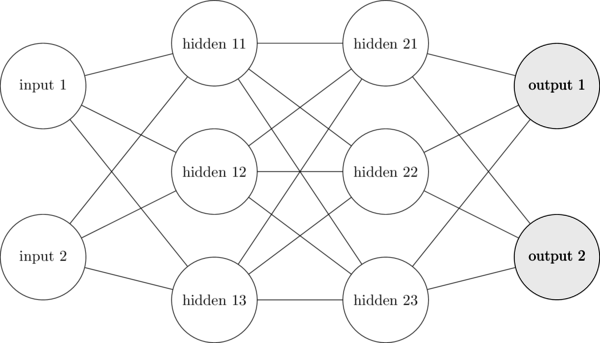

In [18]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node[neuron] (i1) at (0,  2) {input 1};
\node[neuron] (i2) at (0, -2) {input 2};

\node[neuron] (h11) at (4,  3) {hidden 11};
\node[neuron] (h12) at (4,  0) {hidden 12};
\node[neuron] (h13) at (4, -3) {hidden 13};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron] (h21) at (8,  3) {hidden 21};
\node[neuron] (h22) at (8,  0) {hidden 22};
\node[neuron] (h23) at (8, -3) {hidden 23};
\draw[-] (h11) -- (h21);
\draw[-] (h11) -- (h22);
\draw[-] (h11) -- (h23);
\draw[-] (h12) -- (h21);
\draw[-] (h12) -- (h22);
\draw[-] (h12) -- (h23);
\draw[-] (h13) -- (h21);
\draw[-] (h13) -- (h22);
\draw[-] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {output 1};
\node[neuron, fill=gray!10] (o2) at (12, -2) {output 2};
\draw[-] (h21) -- (o1);
\draw[-] (h21) -- (o2);
\draw[-] (h22) -- (o1);
\draw[-] (h22) -- (o2);
\draw[-] (h23) -- (o1);
\draw[-] (h23) -- (o2);


$$
\delta^4_j = y_j - z_j
$$


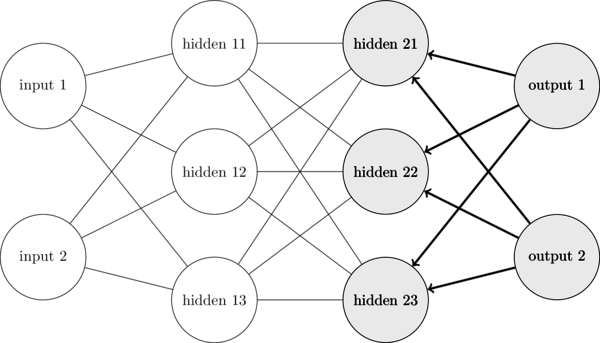

In [19]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node[neuron] (i1) at (0,  2) {input 1};
\node[neuron] (i2) at (0, -2) {input 2};

\node[neuron] (h11) at (4,  3) {hidden 11};
\node[neuron] (h12) at (4,  0) {hidden 12};
\node[neuron] (h13) at (4, -3) {hidden 13};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {hidden 21};
\node[neuron, fill=gray!10] (h22) at (8,  0) {hidden 22};
\node[neuron, fill=gray!10] (h23) at (8, -3) {hidden 23};
\draw[-] (h11) -- (h21);
\draw[-] (h11) -- (h22);
\draw[-] (h11) -- (h23);
\draw[-] (h12) -- (h21);
\draw[-] (h12) -- (h22);
\draw[-] (h12) -- (h23);
\draw[-] (h13) -- (h21);
\draw[-] (h13) -- (h22);
\draw[-] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {output 1};
\node[neuron, fill=gray!10] (o2) at (12, -2) {output 2};
\draw[<-, line width=0.5mm] (h21) -- (o1);
\draw[<-, line width=0.5mm] (h21) -- (o2);
\draw[<-, line width=0.5mm] (h22) -- (o1);
\draw[<-, line width=0.5mm] (h22) -- (o2);
\draw[<-, line width=0.5mm] (h23) -- (o1);
\draw[<-, line width=0.5mm] (h23) -- (o2);

$$
\begin{eqnarray}
  \frac{\partial C}{\partial w^3_{jk}} = z^3_k \delta^4_j
\end{eqnarray}
$$

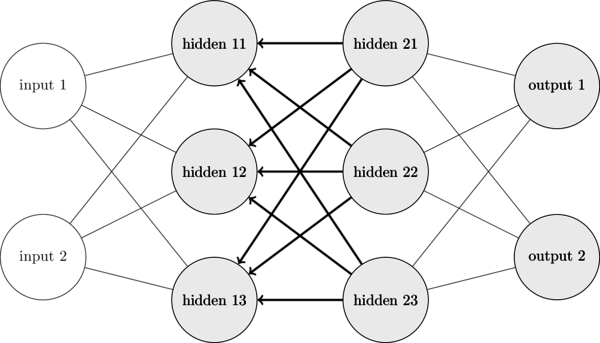

In [20]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node[neuron] (i1) at (0,  2) {input 1};
\node[neuron] (i2) at (0, -2) {input 2};

\node[neuron, fill=gray!10] (h11) at (4,  3) {hidden 11};
\node[neuron, fill=gray!10] (h12) at (4,  0) {hidden 12};
\node[neuron, fill=gray!10] (h13) at (4, -3) {hidden 13};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {hidden 21};
\node[neuron, fill=gray!10] (h22) at (8,  0) {hidden 22};
\node[neuron, fill=gray!10] (h23) at (8, -3) {hidden 23};
\draw[<-, line width=0.5mm] (h11) -- (h21);
\draw[<-, line width=0.5mm] (h11) -- (h22);
\draw[<-, line width=0.5mm] (h11) -- (h23);
\draw[<-, line width=0.5mm] (h12) -- (h21);
\draw[<-, line width=0.5mm] (h12) -- (h22);
\draw[<-, line width=0.5mm] (h12) -- (h23);
\draw[<-, line width=0.5mm] (h13) -- (h21);
\draw[<-, line width=0.5mm] (h13) -- (h22);
\draw[<-, line width=0.5mm] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {output 1};
\node[neuron, fill=gray!10] (o2) at (12, -2) {output 2};
\draw[-] (h21) -- (o1);
\draw[-] (h21) -- (o2);
\draw[-] (h22) -- (o1);
\draw[-] (h22) -- (o2);
\draw[-] (h23) -- (o1);
\draw[-] (h23) -- (o2);

$$
\begin{eqnarray}
  \frac{\partial C}{\partial w^2_{jk}} = z^2_k \delta^3_j
\end{eqnarray}
$$

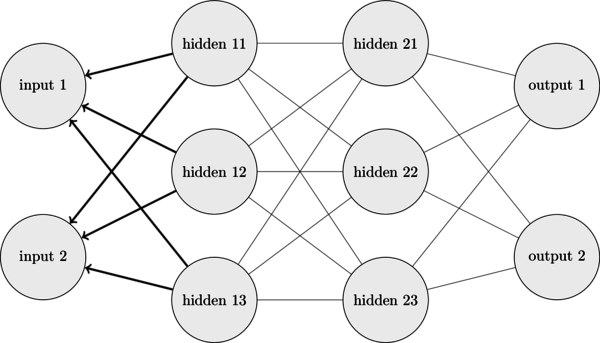

In [21]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node[neuron, fill=gray!10] (i1) at (0,  2) {input 1};
\node[neuron, fill=gray!10] (i2) at (0, -2) {input 2};

\node[neuron, fill=gray!10] (h11) at (4,  3) {hidden 11};
\node[neuron, fill=gray!10] (h12) at (4,  0) {hidden 12};
\node[neuron, fill=gray!10] (h13) at (4, -3) {hidden 13};
\draw[<-, line width=0.5mm] (i1) -- (h11);
\draw[<-, line width=0.5mm] (i2) -- (h11);
\draw[<-, line width=0.5mm] (i1) -- (h12);
\draw[<-, line width=0.5mm] (i2) -- (h12);
\draw[<-, line width=0.5mm] (i1) -- (h13);
\draw[<-, line width=0.5mm] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {hidden 21};
\node[neuron, fill=gray!10] (h22) at (8,  0) {hidden 22};
\node[neuron, fill=gray!10] (h23) at (8, -3) {hidden 23};
\draw[-] (h11) -- (h21);
\draw[-] (h11) -- (h22);
\draw[-] (h11) -- (h23);
\draw[-] (h12) -- (h21);
\draw[-] (h12) -- (h22);
\draw[-] (h12) -- (h23);
\draw[-] (h13) -- (h21);
\draw[-] (h13) -- (h22);
\draw[-] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {output 1};
\node[neuron, fill=gray!10] (o2) at (12, -2) {output 2};
\draw[-] (h21) -- (o1);
\draw[-] (h21) -- (o2);
\draw[-] (h22) -- (o1);
\draw[-] (h22) -- (o2);
\draw[-] (h23) -- (o1);
\draw[-] (h23) -- (o2);

$$
\begin{eqnarray}
  \frac{\partial C}{\partial w^2_{jk}} = z^2_k \delta^3_j
\end{eqnarray}
$$

## 신경망 최적화 정리

정리하면 신경망은 다음과 같이 최적화한다.

1. Input 
 * 하나의 data sample $x_i$로 입력 계층 계산
2. Feedforward
 * 현재의 가중치를 사용하여 다음 계층 계산
3. Output and error
 * 최종 출력 계층의 값 및 오차 계산
4. Backpropagate
 * 반대 방향으로 오차 전파
5. Weight Upddate
 * 가중치 갱신
6. 데이터 샘플을 $x_{i+1}$로 바꾸어 1~6 반복

## Stochastic Gradient Descent 방법론


1. traning dataset 준비
2. mini batch data 선택. 각 data에 대해 gradient 계산
 1. Input 
 1. Feedforward
 1. Output and error
 1. Backpropagate 
3. Gradient descent
 *  mini batch 데이터셋에 대한 gradient 계산
$$w^l \rightarrow w^l-\frac{\eta}{m} \sum_x \delta^{x,l} (a^{x,l-1})^T$$
$$b^l \rightarrow b^l-\frac{\eta}{m} \sum_x \delta^{x,l}$$